# This notebook will be mainly used for the capstone project

In [51]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
import numpy as np
import seaborn as sns
print ('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [2]:
!wget -O accident_severity.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-30 17:37:33--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘accident_severity.csv’

100%[======================================>] 73,917,638  36.0MB/s   in 2.0s   

2020-09-30 17:37:36 (36.0 MB/s) - ‘accident_severity.csv’ saved [73917638/73917638]



In [52]:
accident = pd.read_csv('accident_severity.csv', low_memory=False)
accident.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [53]:
accident.drop(['SEVERITYCODE.1'], axis='columns', inplace=True)
accident.shape

(194673, 37)

In [5]:
accident.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: object

In [84]:
# Categorization
accident['WEATHER'] = pd.Categorical(accident['WEATHER'])
accident['ROADCOND'] = pd.Categorical(accident['ROADCOND'])
accident['LIGHTCOND'] = pd.Categorical(accident['LIGHTCOND'])
accident['LOCATION'] = pd.Categorical(accident['LOCATION'])
accident['SPEEDING'] = pd.Categorical(accident['SPEEDING'])

accident['WEATHER_CODE'] = accident['WEATHER'].cat.codes
accident['ROADCOND_CODE'] = accident['ROADCOND'].cat.codes
accident['LIGHTCOND_CODE'] = accident['LIGHTCOND'].cat.codes
accident['LOCATION_CODE'] = accident['LOCATION'].cat.codes
accident['SPEEDING_CODE'] = accident['SPEEDING'].cat.codes

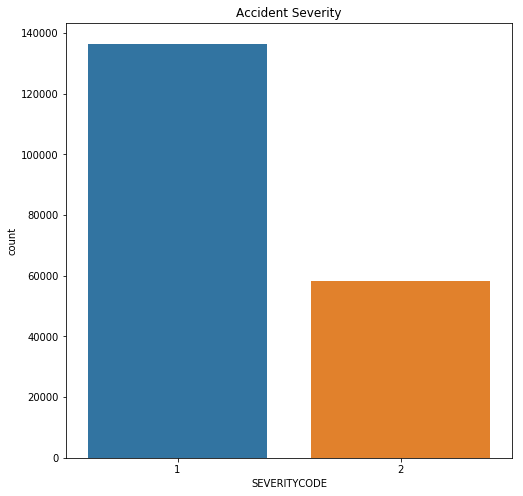

In [55]:
plt.figure(figsize=(8, 8))
sns.countplot('SEVERITYCODE', data=accident)
plt.title('Accident Severity')
plt.show()

In [85]:
study = accident[['SEVERITYCODE', 'WEATHER_CODE', 'ROADCOND_CODE', 'LIGHTCOND_CODE', 'SPEEDING_CODE', 'LOCATION_CODE']]
study.head()

,SEVERITYCODE,WEATHER_CODE,ROADCOND_CODE,LIGHTCOND_CODE,SPEEDING_CODE,LOCATION_CODE
0,2,4,8,5,-1,8793
1,1,6,8,2,-1,10707
2,1,4,0,5,-1,8049
3,1,1,0,5,-1,4647
4,2,6,8,5,-1,22787


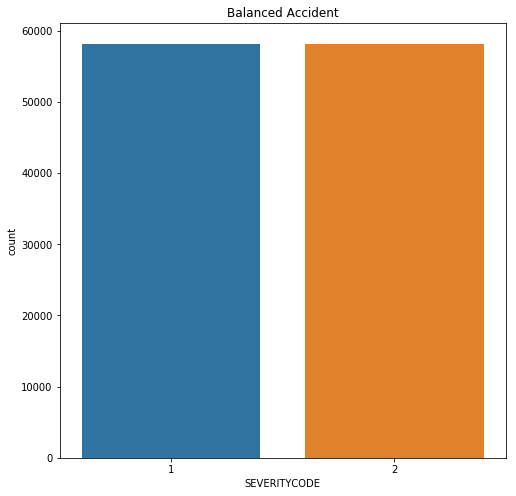

In [86]:
# Under-Sampling
study = accident.sample(frac=1,random_state=4)
high = study.loc[study['SEVERITYCODE'] == 2]
low = study.loc[study['SEVERITYCODE'] == 1].sample(n=58188,random_state=4)
study = pd.concat([high, low])

plt.figure(figsize=(8, 8))
sns.countplot('SEVERITYCODE', data=study)
plt.title('Balanced Accident')
plt.show()

In [87]:
study.dtypes

SEVERITYCODE         int64
X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION          category
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE         int64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER           category
ROADCOND          category
LIGHTCOND         category
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING          category
ST_COLCODE          object
ST_COLDESC          object
SEGLANEKEY           int64
CROSSWALKKEY         int64
HITPARKEDCAR        object
W

In [88]:
study['WEATHER_CODE'] = study['WEATHER_CODE'].astype('float')
study['ROADCOND_CODE'] = study['ROADCOND_CODE'].astype('float')
study['LIGHTCOND_CODE'] = study['LIGHTCOND_CODE'].astype('float')
study['LOCATION_CODE'] = study['LOCATION_CODE'].astype('float')
study['SPEEDING_CODE'] = study['SPEEDING_CODE'].astype('float')
X = np.asarray(study[['WEATHER_CODE','ROADCOND_CODE','LIGHTCOND_CODE', 'LOCATION_CODE', 'SPEEDING_CODE']])
X[0:5]

array([[ 6.0000e+00,  8.0000e+00,  5.0000e+00,  1.0234e+04, -1.0000e+00],
       [ 4.0000e+00,  0.0000e+00,  2.0000e+00,  6.6970e+03, -1.0000e+00],
       [ 1.0000e+00,  0.0000e+00,  5.0000e+00,  1.4040e+03, -1.0000e+00],
       [ 1.0000e+00,  0.0000e+00,  2.0000e+00,  8.5340e+03, -1.0000e+00],
       [ 1.0000e+00,  0.0000e+00,  5.0000e+00,  1.8799e+04, -1.0000e+00]])

In [100]:
y = np.asarray(study['SEVERITYCODE'])
y[0:5]

array([2, 2, 2, 2, 2])

In [101]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.15295188,  1.53205062,  0.42584963, -0.23542754, -0.23161109],
       [ 0.42196701, -0.66944866, -1.225079  , -0.75648627, -0.23161109],
       [-0.67451029, -0.66944866,  0.42584963, -1.53623291, -0.23161109],
       [-0.67451029, -0.66944866, -1.225079  , -0.48586572, -0.23161109],
       [-0.67451029, -0.66944866,  0.42584963,  1.02633894, -0.23161109]])

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (81463, 5) (81463,)
Test set: (34913, 5) (34913,)


# Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [104]:
yhat_lr = LR.predict(X_test)
yhat_lr[0:5]

array([2, 2, 2, 2, 1])

In [105]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.49436767, 0.50563233],
       [0.4853768 , 0.5146232 ],
       [0.47170745, 0.52829255],
       ...,
       [0.48627527, 0.51372473],
       [0.49509834, 0.50490166],
       [0.56703416, 0.43296584]])

In [106]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [107]:
print("Jaccard: ",jaccard_similarity_score(y_test, yhat_lr))
print("F1 Score: ",f1_score(y_test,yhat_lr,average='weighted'))
print("LogLoss :",log_loss(y_test, yhat_prob))

Jaccard:  0.5315498524904764
F1 Score:  0.5153673579298265
LogLoss : 0.683207166119445


# Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth=4)
dt.fit(X_train, y_train)
dt

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [109]:
yhat_dt = dt.predict(X_test)
yhat_dt[0:5]

array([1, 2, 2, 1, 2])

In [110]:
print("F1 Score: ",f1_score(y_test,yhat_dt,average='weighted'))
print("Jaccard: ",jaccard_similarity_score(y_test, yhat_dt))

F1 Score:  0.5315883906538935
Jaccard:  0.5676395611949704
